In [37]:
#pip install pandas

In [38]:
#pip install matplotlib

In [39]:
#import the librarys
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#read the csv file and set the columns names
data = pd.read_csv('log_cortes.csv', names=['date', 'corte'])
data.head()

,date,corte
0,2024-12-30 23:06:26,278
1,2024-12-31 16:37:56,1550
2,2024-12-31 18:04:53,5217
3,2025-01-01 20:50:06,96313
4,2025-01-03 22:55:37,180331


In [41]:
#transfor the data type of the column 'data' to datetime
data['date'] = pd.to_datetime(data['date'])
#transform the data type of the column 'corte' from milliseconds to minutes
data['corte'] = data['corte'] / 60000
data.head()

,date,corte
0,2024-12-30 23:06:26,0.004633
1,2024-12-31 16:37:56,0.025833
2,2024-12-31 18:04:53,0.086950
3,2025-01-01 20:50:06,1.605217
4,2025-01-03 22:55:37,3.005517


In [42]:
data.describe()

,date,corte
count,84,84.000000
mean,2025-03-05 17:48:19.619047680,1.987731
min,2024-12-30 23:06:26,0.003683
25%,2025-02-12 17:58:23.249999872,0.198704
50%,2025-03-06 23:07:02,1.053683
75%,2025-03-31 09:09:48,2.385788
max,2025-04-27 21:06:18,19.174200
std,NaN,3.137073


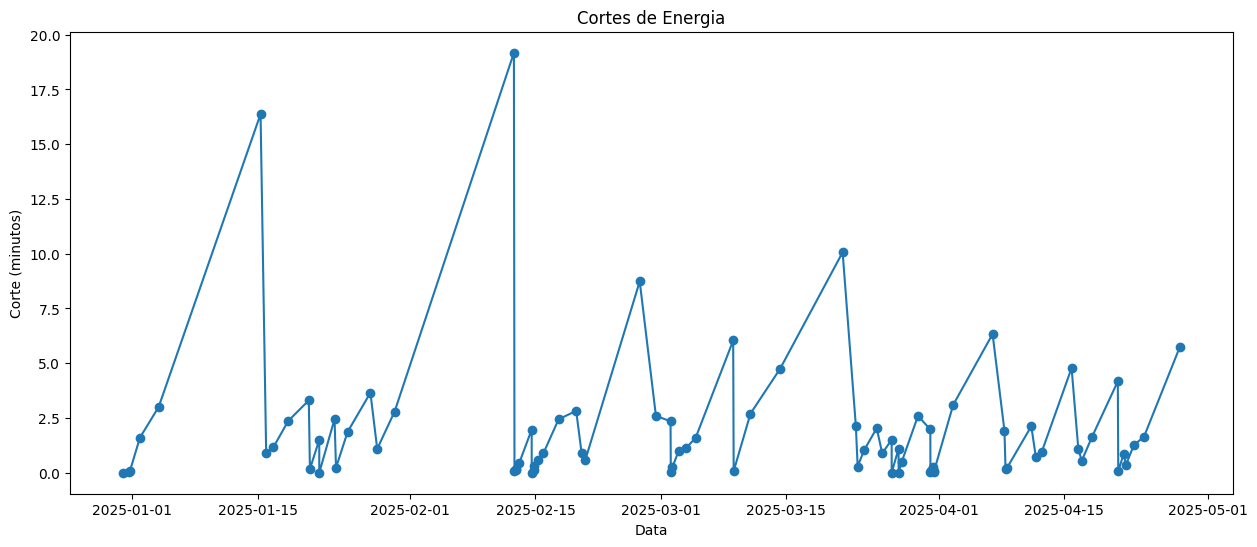

In [43]:
#create a plot with the data and add the points
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['corte'], marker='o')
plt.title('Cortes de Energia')
plt.xlabel('Data')
plt.ylabel('Corte (minutos)')
plt.show()
#data.plot(x='date', y='corte', figsize=(15, 6))

In [44]:
#mean in the last 30 days
data['date'] = pd.to_datetime(data['date'])
data['date'].max()
data['date'].min()
data['date'].max() - data['date'].min()
data['date'].max() - pd.Timedelta(days=30)
data[data['date'] > data['date'].max() - pd.Timedelta(days=30)]['corte'].mean()


np.float64(1.5863783950617287)

In [45]:
#mean in the last 7 days
data[data['date'] > data['date'].max() - pd.Timedelta(days=7)]['corte'].mean()


np.float64(2.0168619047619045)

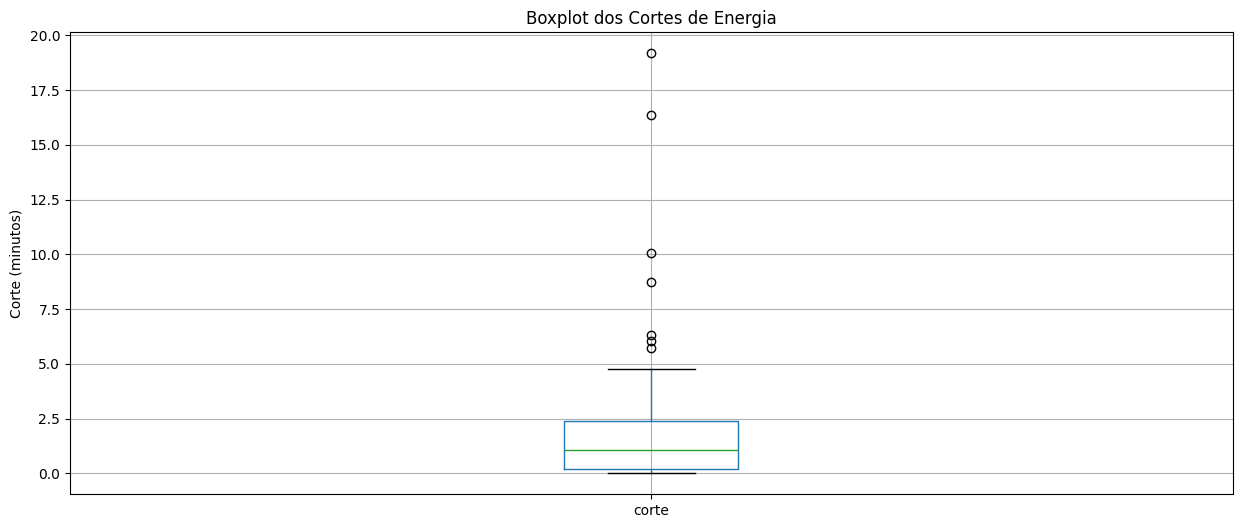

In [46]:
#boxplot of the data
plt.figure(figsize=(15, 6))
data.boxplot(column='corte')
plt.title('Boxplot dos Cortes de Energia')
plt.ylabel('Corte (minutos)')
plt.show()


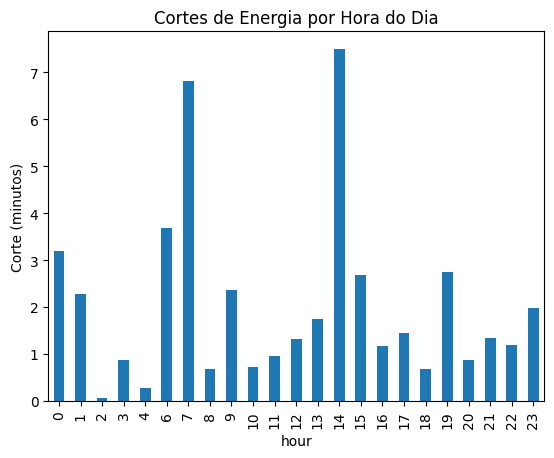

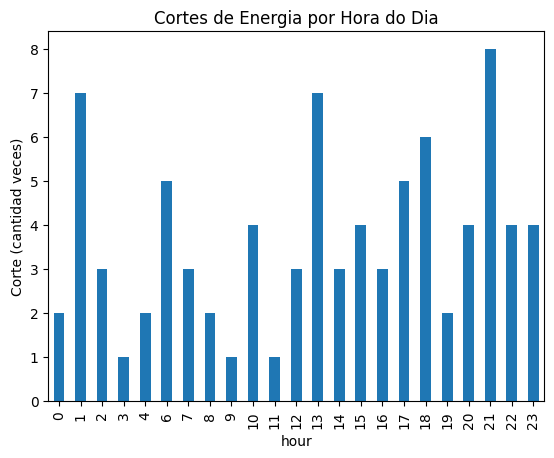

In [47]:
#moment of the day
data['hour'] = data['date'].dt.hour
data['hour'].head()
data.groupby('hour')['corte'].mean()
data.groupby('hour')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Hora do Dia')
plt.ylabel('Corte (minutos)')
plt.show()
data['hour'] = data['date'].dt.hour
data['hour'].head()
data.groupby('hour')['corte'].count()
data.groupby('hour')['corte'].count().plot(kind='bar')
plt.title('Cortes de Energia por Hora do Dia')
plt.ylabel('Corte (cantidad veces)')
plt.show()


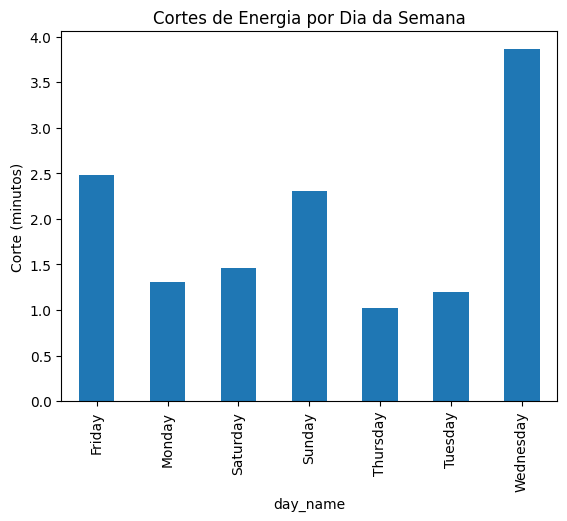

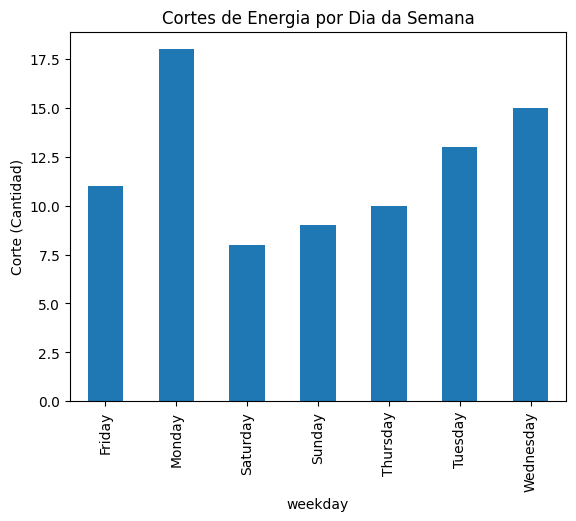

In [48]:
#moment of the week add name of the day
data['day_name'] = data['date'].dt.day_name()
data['day_name'].head()
data.groupby('day_name')['corte'].mean()
data.groupby('day_name')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Dia da Semana')
plt.ylabel('Corte (minutos)')
plt.show()
data['weekday'] = data['date'].dt.day_name()
data['weekday'].head()
data.groupby('weekday')['corte'].count()
data.groupby('weekday')['corte'].count().plot(kind='bar')
plt.title('Cortes de Energia por Dia da Semana')
plt.ylabel('Corte (Cantidad)')
plt.show()

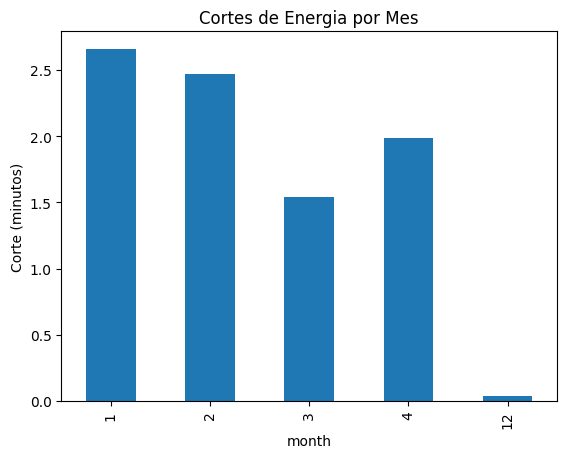

In [49]:
#moment of the month
data['month'] = data['date'].dt.month
data['month'].head()
data.groupby('month')['corte'].mean()
data.groupby('month')['corte'].mean().plot(kind='bar')
plt.title('Cortes de Energia por Mes')
plt.ylabel('Corte (minutos)')
plt.show()

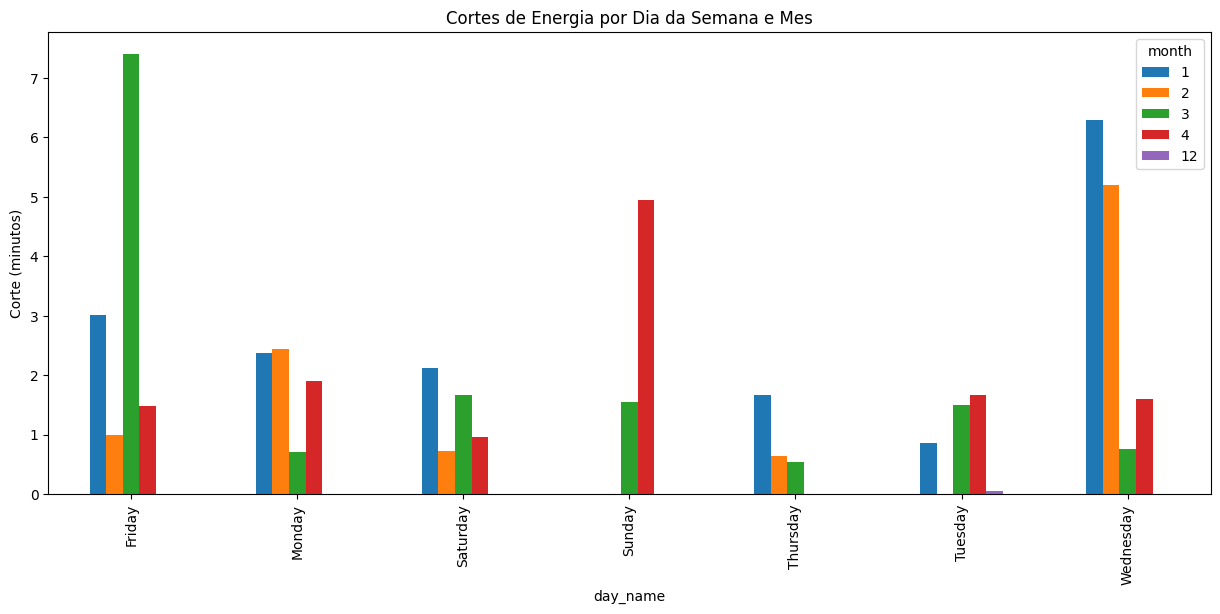

In [52]:
#relation between the day of the week and the month
data.groupby(['day_name', 'month'])['corte'].mean()
data.groupby(['day_name', 'month'])['corte'].mean().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Mes')
plt.ylabel('Corte (minutos)')
plt.show()

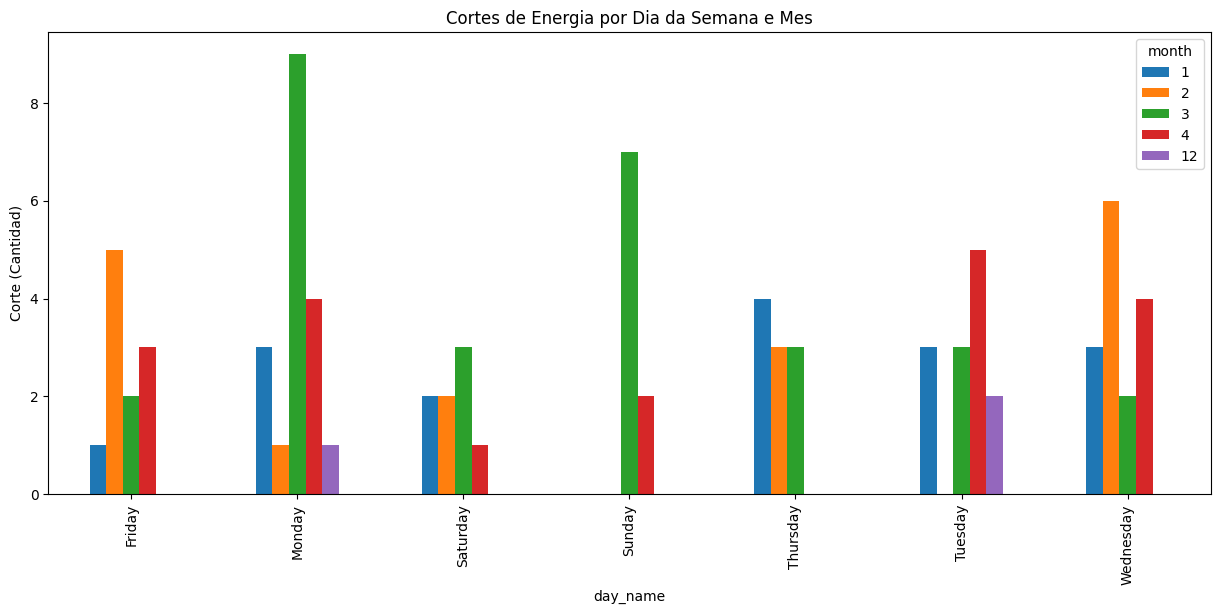

In [53]:
#relation between the day of the week and the month
data.groupby(['day_name', 'month'])['corte'].count()
data.groupby(['day_name', 'month'])['corte'].count().unstack().plot(kind='bar', figsize=(15, 6))
plt.title('Cortes de Energia por Dia da Semana e Mes')
plt.ylabel('Corte (Cantidad)')
plt.show()

In [56]:
#correration between the hour, day of the week and the month with the corte
pd.pivot_table(data, 
               values='corte', 
               index='day_name', 
               columns='month', 
               aggfunc='count').style.background_gradient(cmap='Blues')


month,1,2,3,4,12
day_name,,,,,
Friday,1.000000,5.000000,2.000000,3.000000,nan
Monday,3.000000,1.000000,9.000000,4.000000,1.000000
Saturday,2.000000,2.000000,3.000000,1.000000,nan
Sunday,nan,nan,7.000000,2.000000,nan
Thursday,4.000000,3.000000,3.000000,nan,nan
Tuesday,3.000000,nan,3.000000,5.000000,2.000000
Wednesday,3.000000,6.000000,2.000000,4.000000,nan


In [58]:
#correlation
numerical_data = data.select_dtypes(include=['number'])
numerical_data.corr().style.background_gradient(cmap='Blues')

,corte,hour,month
corte,1.000000,-0.104238,-0.155548
hour,-0.104238,1.000000,0.090543
month,-0.155548,0.090543,1.000000


In [63]:
#predict the corte
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


Mean Squared Error: 2.985057294707353
R2 Score: -0.6464861384743286


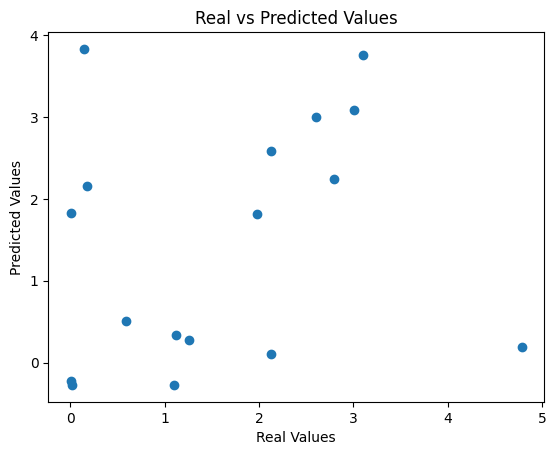

In [64]:
#create the model
X = data[['hour', 'day_name', 'month']]
y = data['corte']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#transform the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['hour']),
        ('cat', OneHotEncoder(), ['day_name', 'month'])
    ])
#transform the data
preprocessor = make_column_transformer(
    (StandardScaler(), ['hour']),
    (OneHotEncoder(), ['day_name', 'month'])
)
#transform the data
model = make_pipeline(preprocessor, LinearRegression())
#fit the model
model.fit(X_train, y_train)
#predict the data
y_pred = model.predict(X_test)
#calculate the error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)
#plot the data
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.show()

In [65]:
#calculate the error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2.985057294707353
R2 Score: -0.6464861384743286


In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 73 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hour      17 non-null     int32 
 1   day_name  17 non-null     object
 2   month     17 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 408.0+ bytes


In [76]:
import datetime
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

# Predecir el próximo mes
next_month = datetime.datetime.now() + pd.DateOffset(months=1)
days_in_month = calendar.monthrange(next_month.year, next_month.month)[1]

# Generar las fechas
dates = pd.date_range(start=next_month, periods=days_in_month, freq='D')
hours = np.arange(0, 24)

# Producto cartesiano de fechas y horas
idx = pd.MultiIndex.from_product([dates, hours], names=['date', 'hour']).to_frame(index=False)
idx['day_name'] = idx['date'].dt.day_name()
idx['month'] = idx['date'].dt.month

# Preparar el DataFrame
X_next_month = idx.copy()
X_next_month['hour'] = X_next_month['hour'].astype(int)
X_next_month['day_name'] = X_next_month['day_name'].astype(str)
X_next_month['month'] = X_next_month['month'].astype(int)

# Debug: revisar meses únicos en la predicción
print('Meses únicos en la predicción:', X_next_month['month'].unique())

# FILTRAR solo los meses que tu modelo conoce (por ejemplo 1–5)
X_next_month_filtered = X_next_month[X_next_month['month'].isin([1, 2, 3, 4, 5])]

# Predecir los datos
y_next_month = model.predict(X_next_month_filtered)

# Calcular la media
mean_next_month = y_next_month.mean()
print('Mean of the next month:', mean_next_month)

# Graficar los datos
plt.figure(figsize=(15, 6))
plt.plot(X_next_month_filtered['date'], y_next_month, marker='o', linestyle='-')
plt.title('Cortes de Energia do Proximo Mes (Meses conocidos)')
plt.xlabel('Data')
plt.ylabel('Corte (minutos)')
plt.show()


Meses únicos en la predicción: [6 7]


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by StandardScaler.